# Data Exploration

Author: CHEN Ee Heng  
Date: 29.08.2023  

In [1]:
# CONSTANTS + VARIABLES
DATA_PATH = "../data/public_maps.csv"

In [2]:
# Load data
import pandas as pd
df = pd.read_csv(DATA_PATH, delimiter=",")
df.head()

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title
0,116533,PFK/Risikomanagement,50,Business,116533,NaN,My first mindmap
1,116533,PFK/Risikomanagement,50,Business,116534,116533.0,Ideas for my novel ...
2,116533,PFK/Risikomanagement,50,Business,116535,116533.0,Welcome again!
3,116533,PFK/Risikomanagement,50,Business,116536,116535.0,We hope you\'ll have fun\nwith MindMeister ...
4,116533,PFK/Risikomanagement,50,Business,116537,116535.0,... and some great ideas too!


In [3]:
print(df[['map_id', 'idea_id', 'idea_parent_id']].min())
print(df[['map_id', 'idea_id', 'idea_parent_id']].max())

map_id            1.0
idea_id           1.0
idea_parent_id    1.0
dtype: float64
map_id            6.319091e+07
idea_id           2.113900e+09
idea_parent_id    1.964170e+09
dtype: float64


In [4]:
def print_df_info(_df: pd.DataFrame) -> None:
    df_headers = _df.columns.tolist()
    df_nan_counts = _df.isna().sum().to_dict()
    df_unique_counts = _df.nunique().to_dict()
    df_counts = _df.count().to_dict()
    print("Number of headers :", len(df_headers))
    print("Headers           :", df_headers)
    print("Number of rows    :", len(_df))
    print("Number of nans    :", df_nan_counts)
    print("Number of uniques :", df_unique_counts)
    print("Number of counts  :", df_counts)

In [5]:
# Raw data
print_df_info(df)

Number of headers : 7
Headers           : ['map_id', 'map_title', 'map_rating', 'map_category_name', 'idea_id', 'idea_parent_id', 'idea_title']
Number of rows    : 13560
Number of nans    : {'map_id': 0, 'map_title': 0, 'map_rating': 0, 'map_category_name': 0, 'idea_id': 0, 'idea_parent_id': 462, 'idea_title': 0}
Number of uniques : {'map_id': 462, 'map_title': 462, 'map_rating': 12, 'map_category_name': 7, 'idea_id': 13560, 'idea_parent_id': 4444, 'idea_title': 8575}
Number of counts  : {'map_id': 13560, 'map_title': 13560, 'map_rating': 13560, 'map_category_name': 13560, 'idea_id': 13560, 'idea_parent_id': 13098, 'idea_title': 13560}


In [6]:
# Check all idea_id has an idea_parent_id
assert df[~df['idea_parent_id'].isin(df['idea_id'])].dropna().empty

# Duplicate check and removal
df_dups = df[
    df.duplicated(
        subset=['map_id', 'map_title', 'map_rating',
                'map_category_name', 'idea_parent_id', 'idea_title'],
        keep=False
    )
]
non_parent_dups = df_dups[~df_dups['idea_id'].isin(df['idea_parent_id'])]
df_dedup = df.drop(non_parent_dups.index)

print("Number of dups    :", len(df_dups))
print("Number dropped    :", len(non_parent_dups))

print_df_info(df_dedup)

Number of dups    : 113
Number dropped    : 94
Number of headers : 7
Headers           : ['map_id', 'map_title', 'map_rating', 'map_category_name', 'idea_id', 'idea_parent_id', 'idea_title']
Number of rows    : 13466
Number of nans    : {'map_id': 0, 'map_title': 0, 'map_rating': 0, 'map_category_name': 0, 'idea_id': 0, 'idea_parent_id': 462, 'idea_title': 0}
Number of uniques : {'map_id': 462, 'map_title': 462, 'map_rating': 12, 'map_category_name': 7, 'idea_id': 13466, 'idea_parent_id': 4438, 'idea_title': 8572}
Number of counts  : {'map_id': 13466, 'map_title': 13466, 'map_rating': 13466, 'map_category_name': 13466, 'idea_id': 13466, 'idea_parent_id': 13004, 'idea_title': 13466}


In [7]:
# Reindexing

def remap_dict(column: str, start_idx=0) -> dict:
    return {k: v for v, k in enumerate(set(df_dedup[column].tolist()),
                                       start_idx)}


id_map = remap_dict('idea_id', 2)
map_category_name_map = remap_dict('map_category_name', 0)
# map_rating_map = remap_dict('map_rating', 0)
# map_title_map = remap_dict('map_title', 0)
# idea_title_map = remap_dict('idea_title', 0)
df_remapped = df_dedup.replace({'map_id': id_map,
                                'map_category_name': map_category_name_map,
                                'idea_id': id_map,
                                'idea_parent_id': id_map,
                                # 'map_title': map_title_map,
                                # 'map_rating': map_rating_map,
                                # 'idea_title': idea_title_map,
                                })

print_df_info(df_remapped)

assert len(df_dedup) == len(df_remapped)
assert (df_dedup.isna().sum().values == df_remapped.isna().sum().values).all()
assert (df_dedup.nunique().values == df_remapped.nunique().values).all()
assert (df_dedup.count().values == df_remapped.count().values).all()

Number of headers : 7
Headers           : ['map_id', 'map_title', 'map_rating', 'map_category_name', 'idea_id', 'idea_parent_id', 'idea_title']
Number of rows    : 13466
Number of nans    : {'map_id': 0, 'map_title': 0, 'map_rating': 0, 'map_category_name': 0, 'idea_id': 0, 'idea_parent_id': 462, 'idea_title': 0}
Number of uniques : {'map_id': 462, 'map_title': 462, 'map_rating': 12, 'map_category_name': 7, 'idea_id': 13466, 'idea_parent_id': 4438, 'idea_title': 8572}
Number of counts  : {'map_id': 13466, 'map_title': 13466, 'map_rating': 13466, 'map_category_name': 13466, 'idea_id': 13466, 'idea_parent_id': 13004, 'idea_title': 13466}


In [8]:
# Replace NAN with 1
df_processed = df_remapped.fillna(1)
print_df_info(df_processed)

Number of headers : 7
Headers           : ['map_id', 'map_title', 'map_rating', 'map_category_name', 'idea_id', 'idea_parent_id', 'idea_title']
Number of rows    : 13466
Number of nans    : {'map_id': 0, 'map_title': 0, 'map_rating': 0, 'map_category_name': 0, 'idea_id': 0, 'idea_parent_id': 0, 'idea_title': 0}
Number of uniques : {'map_id': 462, 'map_title': 462, 'map_rating': 12, 'map_category_name': 7, 'idea_id': 13466, 'idea_parent_id': 4439, 'idea_title': 8572}
Number of counts  : {'map_id': 13466, 'map_title': 13466, 'map_rating': 13466, 'map_category_name': 13466, 'idea_id': 13466, 'idea_parent_id': 13466, 'idea_title': 13466}


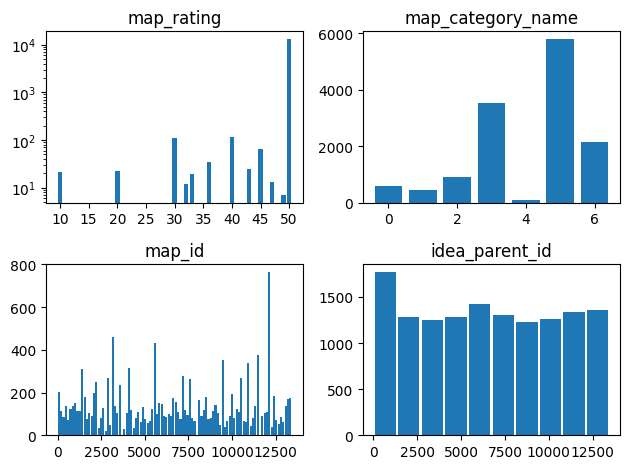

Number of headers : 7
Headers           : ['map_id', 'map_title', 'map_rating', 'map_category_name', 'idea_id', 'idea_parent_id', 'idea_title']
Number of rows    : 13466
Number of nans    : {'map_id': 0, 'map_title': 0, 'map_rating': 0, 'map_category_name': 0, 'idea_id': 0, 'idea_parent_id': 0, 'idea_title': 0}
Number of uniques : {'map_id': 462, 'map_title': 462, 'map_rating': 12, 'map_category_name': 7, 'idea_id': 13466, 'idea_parent_id': 4439, 'idea_title': 8572}
Number of counts  : {'map_id': 13466, 'map_title': 13466, 'map_rating': 13466, 'map_category_name': 13466, 'idea_id': 13466, 'idea_parent_id': 13466, 'idea_title': 13466}


In [9]:
# Visualize per row data

import numpy as np
import matplotlib.pyplot as plt

n_rows = 2
n_cols = 2
fig, _ = plt.subplots(n_rows, n_cols)

ax = plt.subplot(n_rows, n_cols, 1)
ax.set_title("map_rating")
labels, counts = np.unique(df_processed['map_rating'], return_counts=True)
ax.bar(labels, counts, log=True)
ax.set_xticks(np.arange(min(labels), max(labels)+1, 5.0))
ax = plt.subplot(n_rows, n_cols, 2)
ax.set_title("map_category_name")
labels, counts = np.unique(
    df_processed['map_category_name'], return_counts=True)
ax.bar(labels, counts)
ax.set_xticks(np.arange(min(labels), max(labels)+1, 2.0))

# ax = plt.subplot(n_rows, n_cols, 3)
# ax.set_title("map_title")
# ax.hist(df_processed['map_title'], bins=100, rwidth=0.9)
# ax = plt.subplot(n_rows, n_cols, 4)
# ax.set_title("idea_title")
# ax.hist(df_processed['idea_title'], bins=100, rwidth=0.9)

ax = plt.subplot(n_rows, n_cols, 3)
ax.set_title("map_id")
ax.hist(df_processed['map_id'], bins=100, rwidth=0.9)
ax = plt.subplot(n_rows, n_cols, 4)
ax.set_title("idea_parent_id")
ax.hist(df_processed['idea_parent_id'], bins=10, rwidth=0.9)

fig.tight_layout()
plt.show()

print_df_info(df_processed)

In [22]:
# Feature Enginnering 1 : Add idea parent depth 
df_processed['idea_parent_depth'] = 0
df_tmp = df_processed.copy()
while True:
    df_tmp = df_tmp[df_tmp['idea_parent_id'].isin(df_tmp['idea_id'])]
    if df_tmp.index.empty:
        break
    df_processed.loc[df_tmp.index, 'idea_parent_depth'] += 1

# Feature Enginnering 2 : Add map count, number of idea per map.
df_processed['idea_per_map_count'] = 1
df_processed['idea_per_map_count'] = df_processed.groupby('map_id')['idea_per_map_count'].transform('count')

# Feature Enginnering 3 : Add map title text count
df_processed['map_title_count'] = 0
df_processed['map_title_count'] = df_processed['map_title'].str.len()

# Feature Enginnering 4 : Add idea title text count
df_processed['idea_title_count'] = 0
df_processed['idea_title_count'] = df_processed['idea_title'].str.len()

In [23]:
df_processed

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title,idea_parent_depth,idea_per_map_count,map_title_count,idea_title_count
0,6726,PFK/Risikomanagement,50,6,6726,1.0,My first mindmap,0,13,20,16
1,6726,PFK/Risikomanagement,50,6,6727,6726.0,Ideas for my novel ...,1,13,20,22
2,6726,PFK/Risikomanagement,50,6,6728,6726.0,Welcome again!,1,13,20,14
3,6726,PFK/Risikomanagement,50,6,6729,6728.0,We hope you\'ll have fun\nwith MindMeister ...,2,13,20,46
4,6726,PFK/Risikomanagement,50,6,6730,6728.0,... and some great ideas too!,2,13,20,29
...,...,...,...,...,...,...,...,...,...,...,...
13555,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,1257,1254.0,Medical/Wellness,2,13,31,16
13556,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,1260,1254.0,Lifestyle/Non-Medical,2,13,31,21
13557,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,2034,1122.0,Training Program,1,13,31,16
13558,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,2035,2034.0,Contracted Leaders,2,13,31,18


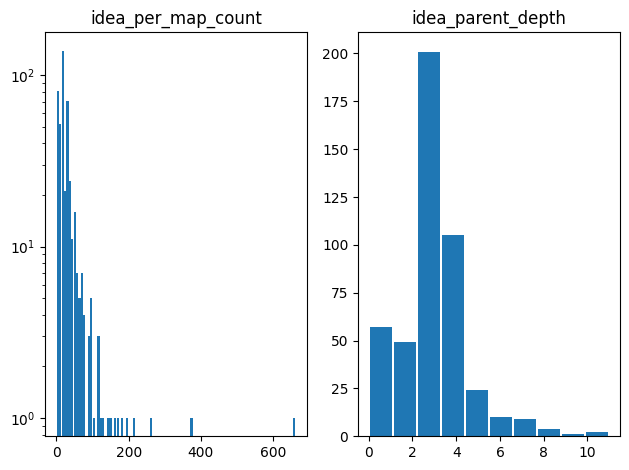

Number of headers : 10
Headers           : ['map_id', 'map_title', 'map_rating', 'map_category_name', 'idea_id', 'idea_parent_id', 'idea_title', 'idea_parent_depth', 'idea_per_map_count', 'map_title_count']
Number of rows    : 13466
Number of nans    : {'map_id': 0, 'map_title': 0, 'map_rating': 0, 'map_category_name': 0, 'idea_id': 0, 'idea_parent_id': 0, 'idea_title': 0, 'idea_parent_depth': 0, 'idea_per_map_count': 0, 'map_title_count': 0}
Number of uniques : {'map_id': 462, 'map_title': 462, 'map_rating': 12, 'map_category_name': 7, 'idea_id': 13466, 'idea_parent_id': 4439, 'idea_title': 8572, 'idea_parent_depth': 12, 'idea_per_map_count': 93, 'map_title_count': 93}
Number of counts  : {'map_id': 13466, 'map_title': 13466, 'map_rating': 13466, 'map_category_name': 13466, 'idea_id': 13466, 'idea_parent_id': 13466, 'idea_title': 13466, 'idea_parent_depth': 13466, 'idea_per_map_count': 13466, 'map_title_count': 13466}


In [12]:
# Visualize per map data

import numpy as np
import matplotlib.pyplot as plt

n_rows = 1
n_cols = 2
fig, _ = plt.subplots(n_rows, n_cols)

ax = plt.subplot(n_rows, n_cols, 1)
ax.set_title("idea_per_map_count")
idea_per_map_count = df_processed[['map_id', 'idea_per_map_count']].drop_duplicates()['idea_per_map_count']  # noqa
ax.hist(idea_per_map_count, bins=100, rwidth=0.9, log=True)
ax = plt.subplot(n_rows, n_cols, 2)
ax.set_title("idea_parent_depth")
idea_parent_depth_permap = df_processed.groupby('map_id')[['map_id', 'idea_parent_depth']].transform('max').drop_duplicates()['idea_parent_depth']  # noqa
ax.hist(idea_parent_depth_permap, bins=10, rwidth=0.9)

fig.tight_layout()
plt.show()

print_df_info(df_processed)

In [13]:
df_processed

,map_id,map_title,map_rating,map_category_name,idea_id,idea_parent_id,idea_title,idea_parent_depth,idea_per_map_count,map_title_count
0,6726,PFK/Risikomanagement,50,6,6726,1.0,My first mindmap,0,13,13
1,6726,PFK/Risikomanagement,50,6,6727,6726.0,Ideas for my novel ...,1,13,13
2,6726,PFK/Risikomanagement,50,6,6728,6726.0,Welcome again!,1,13,13
3,6726,PFK/Risikomanagement,50,6,6729,6728.0,We hope you\'ll have fun\nwith MindMeister ...,2,13,13
4,6726,PFK/Risikomanagement,50,6,6730,6728.0,... and some great ideas too!,2,13,13
...,...,...,...,...,...,...,...,...,...,...
13555,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,1257,1254.0,Medical/Wellness,2,13,13
13556,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,1260,1254.0,Lifestyle/Non-Medical,2,13,13
13557,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,2034,1122.0,Training Program,1,13,13
13558,1122,HACIA UNA PEDAGOGIA\rDIALOGANTE,50,3,2035,2034.0,Contracted Leaders,2,13,13
